**Mounting Google Drive**

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Importing the packages from the path**

---

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/colab_env/lib/python3.10/site-packages")
sys.path.append("/content/drive/MyDrive/Colab Notebooks/colab_env_/lib/python3.10/site-packages")

In [ ]:
# %pip install --upgrade --quiet pymupdf

**Loading the pdf using PyMuPDF Loader**

---

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

file_path = (
    "/content/drive/MyDrive/Introduction to Machine Learning with Python.pdf"
)
loader = PyMuPDFLoader(file_path)


In [ ]:
data = loader.load()

**Using RecursiveCharacterTextSplitter to split the data into chunks each of size 500 characters with an overlap of 50**

---

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents(data)

In [ ]:
print("Number of Documents:", len(data))
print()
print("Number of Chunks:", len(chunks))

Number of Documents: 392

Number of Chunks: 1682


**I used this to check size of chunks**

---

In [ ]:
for i in range(len(chunks)):
  print(len(chunks[i].page_content))

109
186
407
475
440
422
156
439
474
373
399
386
464
457
124
471
475
475
460
462
456
491
485
452
370
439
476
488
460
437
463
460
459
421
390
416
462
436
481
487
385
373
176
423
489
494
498
173
441
449
498
475
424
100
500
498
326
464
429
482
499
287
471
475
472
307
481
422
465
368
441
497
442
444
82
427
425
478
488
415
428
113
472
430
482
422
463
495
452
418
428
447
427
444
442
488
432
450
430
449
215
498
499
458
467
446
113
483
431
475
432
247
426
473
489
496
497
489
209
417
428
487
169
470
435
455
186
485
418
464
398
418
448
469
481
470
467
190
471
493
412
431
492
492
141
457
424
497
477
396
428
437
427
452
434
494
440
435
493
478
495
343
484
497
453
435
497
277
497
482
415
493
485
447
424
477
238
500
498
457
459
329
455
496
497
346
496
464
425
435
473
471
37
487
476
497
457
307
468
448
430
468
441
153
463
484
445
330
459
458
422
487
458
179
448
465
361
500
499
481
233
478
445
428
472
222
494
472
113
497
492
415
491
428
447
420
471
470
496
401
499
489
465
420
289
475
109
377
482
354
44

**Utilized opensource embeddings model from hugging face** ```thenlper/gte-small``` **to create embeddings for the chunks. Note that** ```'max_seq_length': 512``` **this is the reason why i selected chunk size as 500**.

---

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings


In [ ]:
model_name = "thenlper/gte-small"
embeddings_model = HuggingFaceEmbeddings(model_name=model_name)

/content/drive/MyDrive/Colab Notebooks/colab_env_/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings_model

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-small', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

**Utilized Chroma Vector Database (which is open-source) to store the embeddings**

---

In [ ]:
from langchain_chroma import Chroma

In [ ]:
# !pip install chromadb==0.5.3

In [ ]:
CHROMA_PATH = "/content/drive/MyDrive/Pdf_Database"

# Load it into Chroma
db = Chroma(collection_name="vector_database",
            embedding_function=embeddings_model,
            persist_directory=CHROMA_PATH)

In [ ]:
db.add_documents(chunks)

['69797027-2205-4550-b1d3-7a6678ad67b1',
 'e9c222c6-3e70-46dc-8591-b25e6c526901',
 'e6077b5d-c316-4edb-bbf8-edf7197b65de',
 'f893573e-8bff-45ee-859e-e05e25fd4ec7',
 '222bbd2c-29c2-4bc0-b4e7-ed24e747a864',
 '97d45b62-4bf3-4797-b32a-475c10fff865',
 'd57fb5ff-0842-4a42-9286-c14ba5d5d91c',
 'a59303b1-6c06-4b29-9d40-b7cb8dc64ac9',
 'f9513446-b2d5-4415-82c4-3d7899d3062f',
 '7e22c132-3e39-4c85-8f26-d18cb05d42ee',
 '5147956b-2bf6-4fc3-b335-6f41ee03a878',
 '7b94abfc-4ef9-4f2a-a98a-4f9aa7c92903',
 '7cd34de3-3efe-4772-8b39-ccca90532bba',
 '1c79155b-1402-4e63-a798-b0cea0024b42',
 'e0e7e7e3-2dbb-4fd0-8edf-70dc40a0767c',
 '65258175-418e-4a0d-8adf-5c849438e593',
 '0677f7fc-14a3-4836-977b-334ccec8979e',
 'b64fabbe-2f99-4b60-8297-d73a180d692e',
 '266924bf-4126-425a-9807-11206ee0cc9a',
 '3d887162-927a-4261-a979-9dd0f91d87be',
 '9b152ebb-ed31-48b7-a91c-06507aa5e267',
 '27322a28-bcbf-46f7-aca5-c7a4f208bfc6',
 '0bf15f83-336e-4967-a23a-1ddee87e0825',
 '4fe63f39-cd97-4a75-b2eb-058d9d22369c',
 '1816a13b-2f1a-

In [ ]:
print(len(db.get()["ids"]))

1682


**building a retriever from Chroma vectorstore using its** ```.as_retriever``` **method.**

---

In [ ]:
retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": 3})


**Creating a Chat Prompt Template which has System Message and Prompt Template**

---

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage

SYS_MESSAGE = """ You are an AI assistant specialized in answering questions using
retrieved contextual information. Your task is to carefully analyze the provided context
and deliver a precise, accurate response.

-> Use only the information given in the retrieved context to formulate your answer.
-> If the context does not provide enough information to answer the question,
state clearly that you do not know.
-> Ensure your response is concise, clear."""

system_message = SystemMessage(content=SYS_MESSAGE)

PROMPT_TEMPLATE = """
Answer the question based only on the following context:
{context}
Answer the question based on the above context: {question}.
Provide a detailed answer.
Don’t justify your answers.
Don’t give information not mentioned in the CONTEXT INFORMATION.
Do not say "according to the context" or "mentioned in the context" or similar.
"""

prompt_template = ChatPromptTemplate.from_messages([system_message, PROMPT_TEMPLATE])

**Using OpenAI's Chatmodel for Question-Answering Tasks**

---



In [ ]:
from google.colab import userdata
key = userdata.get('OpenAI')

In [ ]:
# Initialize a Chat Model
from langchain_openai import ChatOpenAI
chat_model = ChatOpenAI(openai_api_key=key)

**using** ```StrOutputParser``` **to convert the output of a language model, whether from an LLM or a ChatModel, into a string format.**

---



In [ ]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

**Building the RAG chain which takes the question and retrieved context to a chat prompt template, then passes it to model, the output of the model is converted to String format then gives the final output to the end user**

---




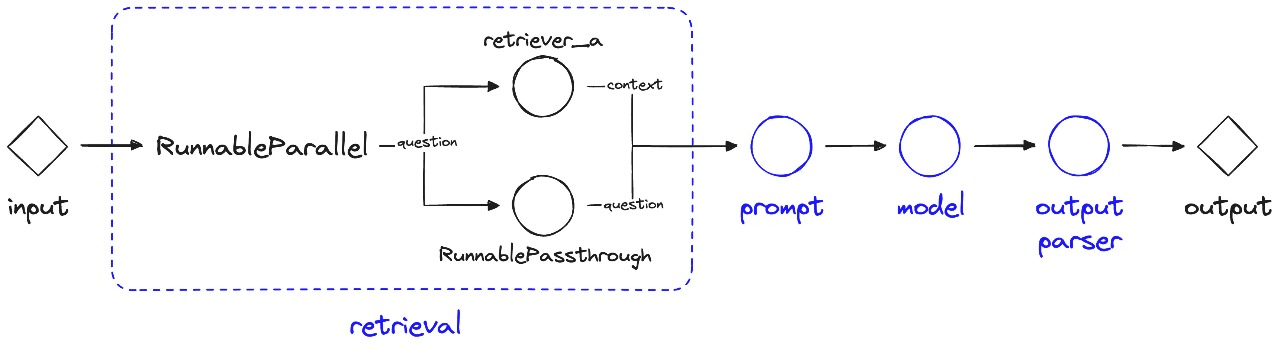

In [ ]:
# Define a RAG Chain

from langchain_core.runnables import RunnablePassthrough

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = {"context": retriever | format_docs, "question": RunnablePassthrough()} | prompt_template | chat_model | parser


**Testing the RAG**

---

In [ ]:
query = "What is Cross Validation"
rag_chain.invoke(query)

"Cross-validation is a method used to evaluate how well a given algorithm will generalize when trained on a specific dataset. It involves splitting the data repeatedly into multiple parts, training models on different subsets, and evaluating their performance. The most common type is k-fold cross-validation, where the data is divided into k equal parts (usually 5 or 10), called folds. This process helps in assessing the algorithm's performance more accurately and is often used in conjunction with parameter search methods like grid search. Cross-validation is not used to build a model for new data but to assess the generalization ability of the algorithm on the dataset it was trained on."

In [ ]:
query = "Code to implement Cross Validation"
rag_chain.invoke(query)

'The code to implement Cross Validation can involve using Grid Search with a combination of cross-validation strategies in the inner and outer loops. This can be done by visualizing the process as for loops, which helps in understanding the evaluation of different parameter combinations effectively.'

In [ ]:
query = "What are the assumptions of Linear Regression"
rag_chain.invoke(query)

'The assumptions of Linear Regression are:\n1. The relationship between the features and the target variable is linear.\n2. The errors in the model are normally distributed.\n3. The errors are homoscedastic, meaning the variance of the errors is constant across all levels of the target variable.\n4. The features are independent of each other (no multicollinearity).'

In [ ]:
query = "What is Overfitting and Underfitting"
rag_chain.invoke(query)

'Overfitting occurs when a model is too complex for the amount of information available, fitting too closely to the training set but failing to generalize to new data. On the other hand, underfitting happens when a model is too simple, not capturing all aspects of the data and performing poorly even on the training set.'

In [ ]:
query = "is KNN supervised or unsupervised technique?"
rag_chain.invoke(query)

'KNN is a supervised technique.'

In [ ]:
query = "Explain in brief the working of KNN"
rag_chain.invoke(query)

'K-Nearest Neighbors (KNN) is a straightforward algorithm used for building models and making predictions in machine learning. It operates by storing the training set data and then predicting the class of new data points based on the majority class of its k-nearest neighbors. The algorithm is easy to understand and usually performs reasonably well with minimal tuning. However, it may become slow for predictions when dealing with large training sets.'

In [ ]:
query = "What is PCA? Where is it used?"
rag_chain.invoke(query)

'PCA stands for Principal Component Analysis. It is used for visualizing high-dimensional data, which involves transforming the original features into a new set of variables called principal components. These principal components are combinations of the original features that capture the most significant information in the data while reducing its dimensionality. PCA is commonly utilized for tasks such as noise removal from data and visualizing the retained information using the principal components.'

In [ ]:
query = "What is the difference between Bag-of-Words and tf-idf? Which is better"
rag_chain.invoke(query)

'The main difference between Bag-of-Words and tf-idf is that Bag-of-Words represents text as a set of words without considering the order or frequency of words, while tf-idf considers the frequency of words in a document relative to their frequency across all documents. In terms of which is better, tf-idf is generally considered more advanced and effective as it takes into account the importance of words in a document based on their frequency and uniqueness in the corpus.'

In [ ]:
query = "What is the difference between Python 2 and Python 3"
rag_chain.invoke(query)

'Python 2 is no longer actively developed, while Python 3 is the latest version with the latest release being 3.5 at the time of writing. Python 2 code usually does not run on Python 3 due to major changes in Python 3. It is recommended to use Python 3 for new projects, but if working with legacy software, Python 2 can still be utilized for the time being.'

In [ ]:
query = "What is mglearn?"
rag_chain.invoke(query)

'mglearn is a library of utility functions created for the purpose of the book mentioned in the context. It is used to quickly generate visually appealing plots and access interesting data without cluttering the main code with intricate details of plotting and data loading.'

In [ ]:
query = "What is explained variance in PCA?"
rag_chain.invoke(query)

'Explained variance in PCA refers to the amount of variance in the data that is captured by each principal component. The principal components are ordered by the amount of variance they explain, with the first principal component explaining the most variance and subsequent components explaining less and less variance.'